# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Градиент MSE записывается как

$$\nabla Q(w) = \dfrac{2}{\ell}X^T(Xw - y).$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [1]:
import numpy as np
from descents import BaseDescent
np.random.seed(777)

n_objects = 5
n_features = 2
base_desc = BaseDescent(n_features)
X = np.random.uniform(-1, 1, (n_objects, n_features))
y = np.random.uniform(-1, 1, n_objects)
y_pred = base_desc.predict(X)
print(f'Calc_loss: {base_desc.calc_loss(y_pred,y)}.. ',
      f'Prediction: {y_pred}')

Calc_loss: 0.3461449973753717..  Prediction: [-0.1579953   0.36057283  0.23166919  0.01662838 -0.37832382]


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [2]:
from descents import VanillaGradientDescent
np.random.seed(777)

vanilla_grad = VanillaGradientDescent(n_features)
grad = vanilla_grad.calc_gradient(X,y)
print(f'Вес до градиентного спуска: \n {vanilla_grad.w}\n\n', vanilla_grad.lr, sep='')
print(f'\nГрадиент: {vanilla_grad.update_weights(grad)}\n')
print(f'Вес после градиентного спуска: \n {vanilla_grad.w}\n\n', vanilla_grad.lr, sep='')
y_pred = vanilla_grad.predict(X)
print(f'\nCalc_loss: {base_desc.calc_loss(y_pred,y)}')

Вес до градиентного спуска: 
 [0.15266373 0.30235661]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=0)

Градиент: [-0.00031705 -0.00021425]

Вес после градиентного спуска: 
 [0.15234668 0.30214236]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=1)

Calc_loss: 0.3459380205558741


### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [3]:
from descents import StochasticDescent
np.random.seed(777)

stochastic_grad = StochasticDescent(n_features, batch_size=50)
grad = stochastic_grad.calc_gradient(X,y)
print(f'Вес до градиентного спуска: \n {stochastic_grad.w}\n\n', stochastic_grad.lr, sep='')
print(f'\nГрадиент: {stochastic_grad.update_weights(grad)}\n')
print(f'Вес после градиентного спуска: \n {stochastic_grad.w}\n\n', stochastic_grad.lr, sep='')
y_pred = stochastic_grad.predict(X)
print(f'\nCalc_loss: {stochastic_grad.calc_loss(y_pred,y)}')

Вес до градиентного спуска: 
 [0.15266373 0.30235661]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=0)

Градиент: [-1.22167902e-04  3.45311502e-05]

Вес после градиентного спуска: 
 [0.15254157 0.30239114]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=1)

Calc_loss: 0.3461006877555498


### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [4]:
from descents import MomentumDescent
np.random.seed(777)

momentum_grad = MomentumDescent(n_features)
grad = momentum_grad.calc_gradient(X,y)
print(f'Вес до градиентного спуска: \n {momentum_grad.w}\n\n', momentum_grad.lr, sep='')
print(f'\nИзменения w: {momentum_grad.update_weights(grad)}\n')
print(f'Вес после градиентного спуска: \n {momentum_grad.w}\n\n', momentum_grad.lr, sep='')
y_pred = momentum_grad.predict(X)
print(f'\nCalc_loss: {momentum_grad.calc_loss(y_pred,y)}')

Вес до градиентного спуска: 
 [0.15266373 0.30235661]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=0)

Изменения w: [-0.00031705 -0.00021425]

Вес после градиентного спуска: 
 [0.15234668 0.30214236]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=1)

Calc_loss: 0.3459380205558741


### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [5]:
from descents import Adam
np.random.seed(777)

adam = Adam(n_features)
grad = adam.calc_gradient(X,y)
print(f'Вес до градиентного спуска: \n {adam.w}\n\n', adam.lr, sep='')
print(f'\nГрадиент: {adam.update_weights(grad)}\n')
print(f'Вес после градиентного спуска: \n {adam.w}\n\n', adam.lr, sep='')
y_pred = adam.predict(X)
print(f'\nCalc_loss: {adam.calc_loss(y_pred,y)}')

Вес до градиентного спуска: 
 [0.15266373 0.30235661]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=0)

Градиент: [-0.00070711 -0.00070711]

Вес после градиентного спуска: 
 [0.15195663 0.3016495 ]

LearningRate(lambda_=0.001, s0=1, p=0.5, iteration=1)

Calc_loss: 0.34561438975570524


## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [6]:
X = np.column_stack((X,np.ones(n_objects)))

In [7]:
from linear_regression import LinearRegression
np.random.seed(777)

descent_config = {
    'descent_name': 'full',
    'regularized' : False,
    'kwargs': {
        'dimension': n_features + 1
    }
}
lin_reg = LinearRegression(descent_config, max_iter=10000)
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X)
print(f'Calc_loss: {lin_reg.calc_loss(y_pred,y)}')

Calc_loss: 0.310428728511431


## Задание 3. Проверка кода (0 баллов)

In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [10]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [11]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [12]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

Контест максимально кривой. Пожадничали временем и VanillaGradientDescent и LinearRegression не проходят по времени :(   
Остальное - ОК

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [14]:
df = pd.read_csv('autos.csv')

In [15]:
df.isnull().sum() #нет элементов Nan

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

In [16]:
df.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

График распределения целевой переменной

<AxesSubplot:>

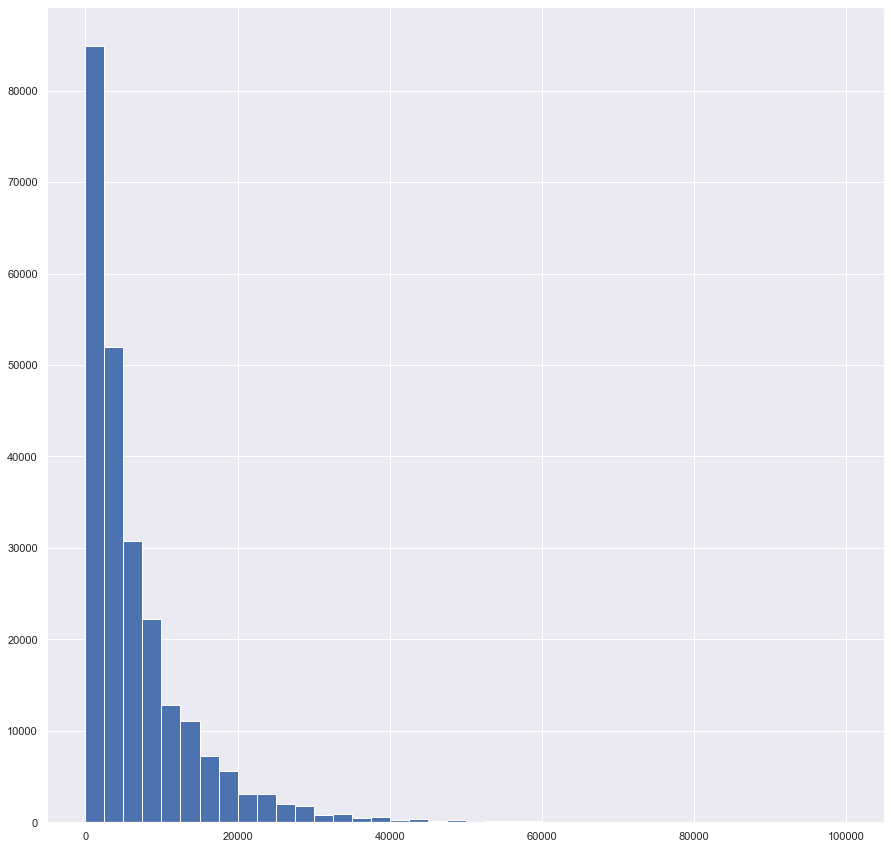

In [17]:
df.price.hist(bins=40, figsize=(15,15))

In [18]:
df = df.assign(log_price=np.log1p(df.price))
df.drop('price', axis=1, inplace=True)

<AxesSubplot:>

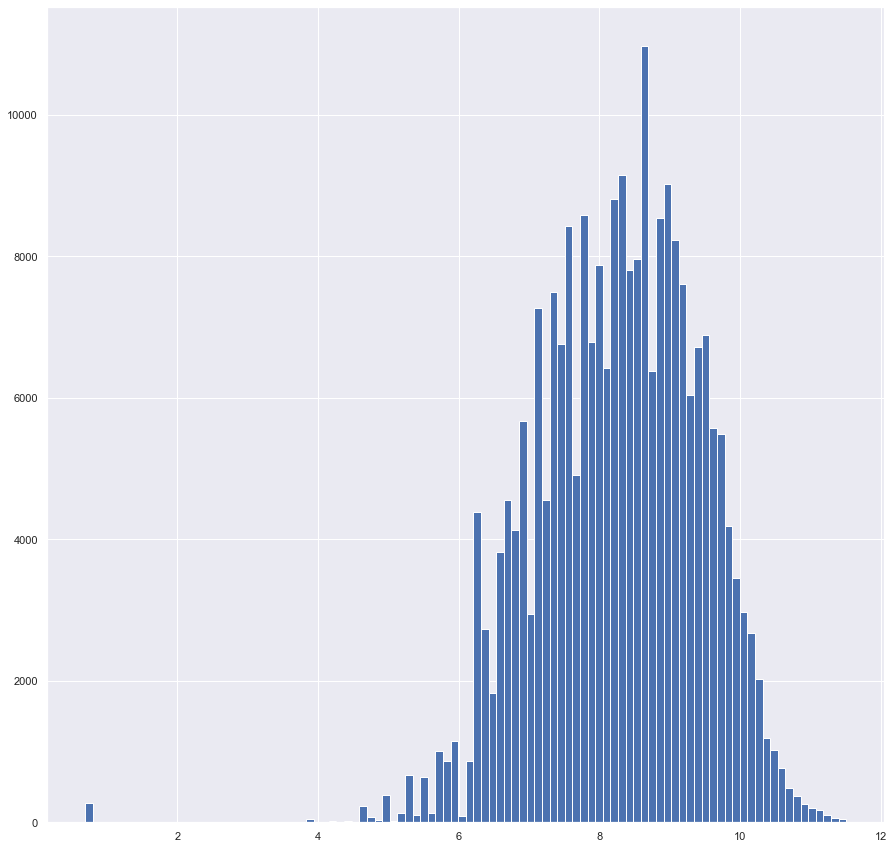

In [19]:
df.log_price.hist(bins=100, figsize=(15,15))

Из графика точно видно, что значения меньше 4 - выбросы. Давайте посмотрим на данные, меньшие квантили 0.01 (если отсортировать в порядке возрастания список по log_price - это будет 1% сверху списка)

In [20]:
df[df.log_price < np.quantile(df.log_price, 0.01)]['log_price'].max()

5.521460917862246

Посмотрим чему равна стоимость

In [21]:
np.expm1(5.521460917862246)

248.9999999999999

Очень маловероятно, что авто стоит 249 долларов (~17.5к в рублях) -- слишком дешево, скорее всего выброс. Таких объектов - 0.01, плюс всего объектов - много, можем смело удалять

In [22]:
df = df[df.log_price > np.quantile(df.log_price, 0.01)]

In [23]:
df.log_price.min()

5.529429087511423

<AxesSubplot:>

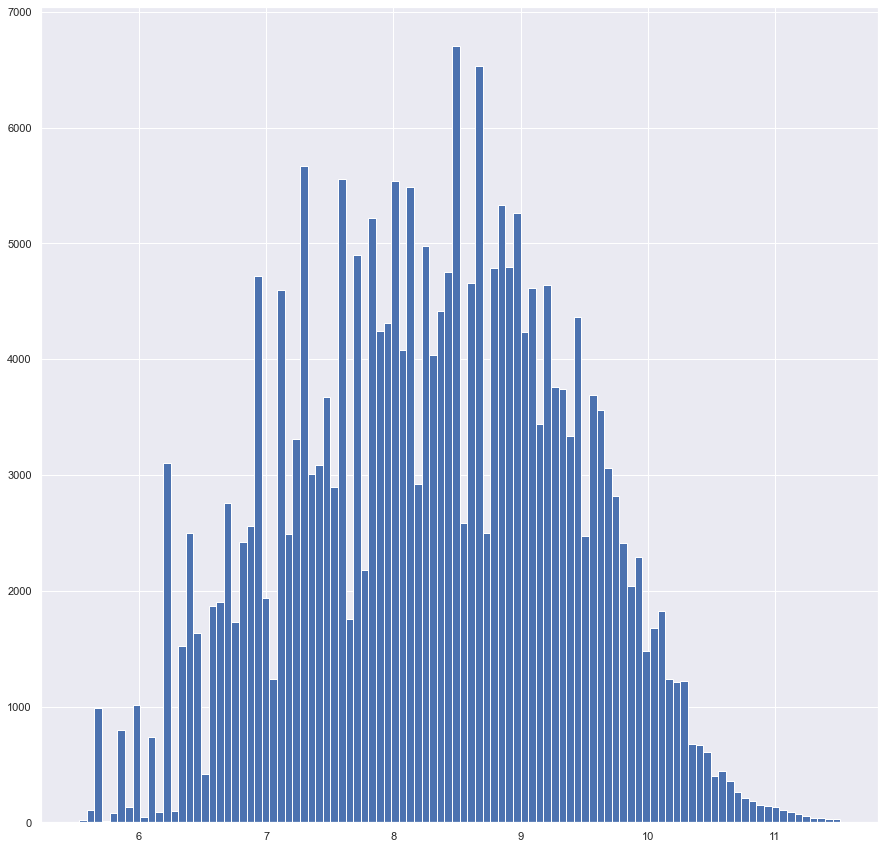

In [24]:
df.log_price.hist(bins=100, figsize=(15,15))

Так то лучше

In [25]:
df.nunique()

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
log_price            4825
dtype: int64

Построим распределение значений каждого признака, model, powerPS, autoAgeMonths, price, log_price смотреть не будем -- слишком много значений

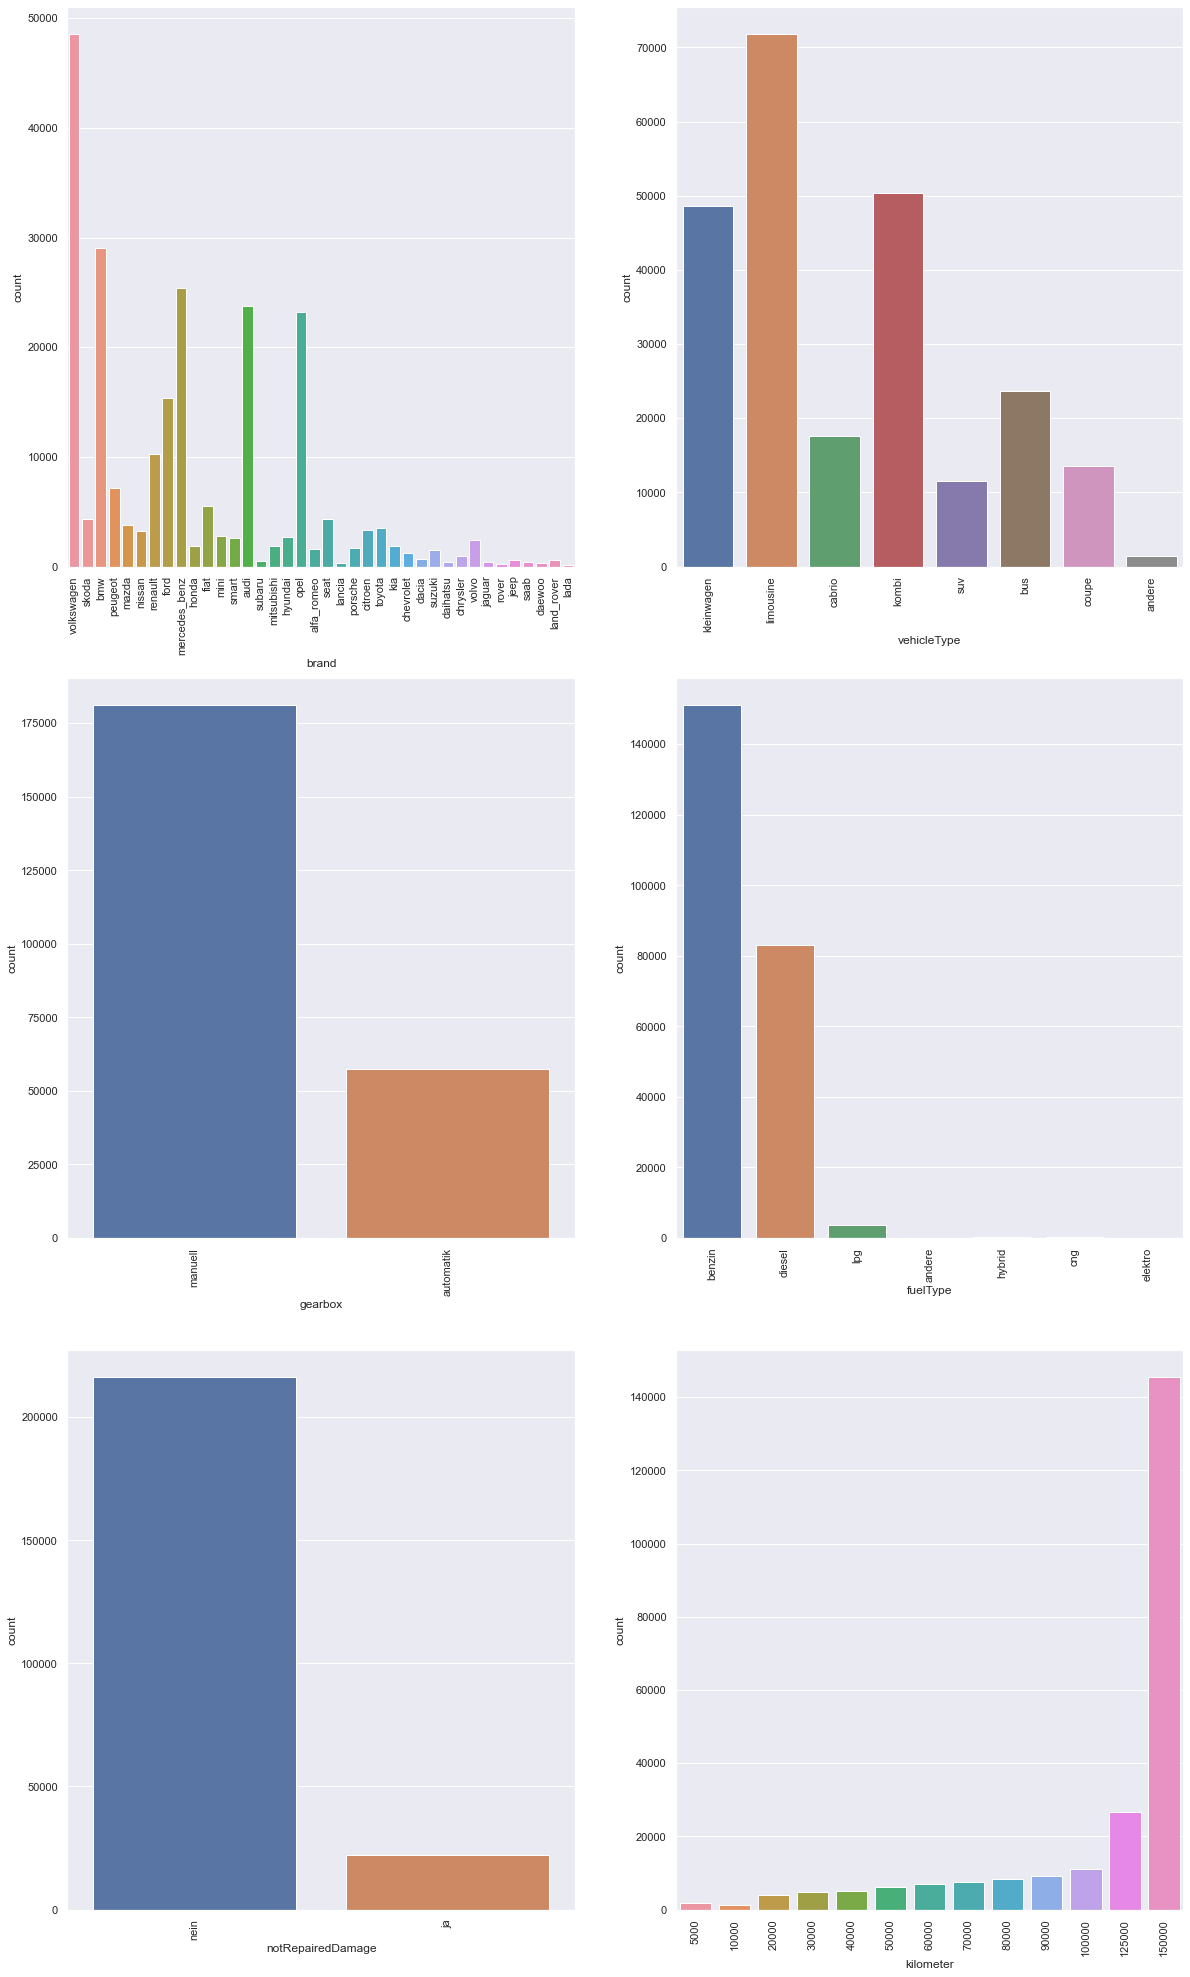

In [26]:
import pylab

sns.set(rc={'figure.figsize':(20,35)})

col_not_to_get = ['model','powerPS', 'autoAgeMonths', 'log_price']
gt = df.drop(columns=col_not_to_get)

for ind_ in range(1,gt.shape[1] + 1):
    pylab.subplot(3,2,ind_)
    sns.countplot(data=gt,x=gt.iloc[:,ind_-1])
    plt.xticks(rotation=90);

Посмотрим на зависимости признаков от целевой переменной

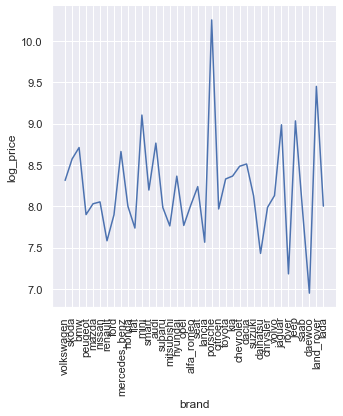

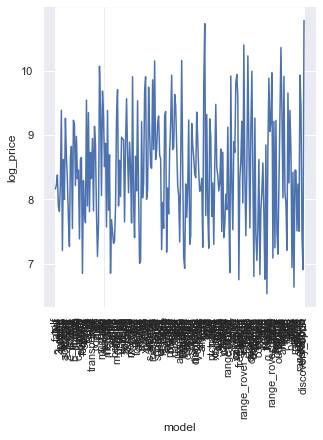

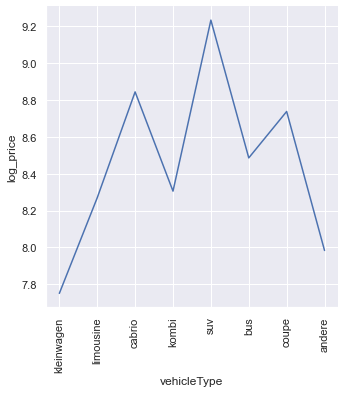

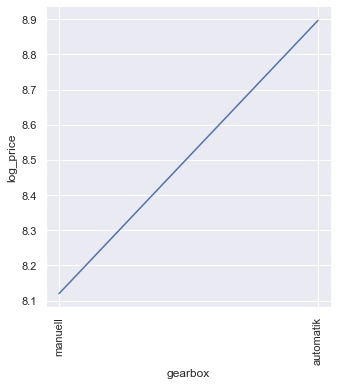

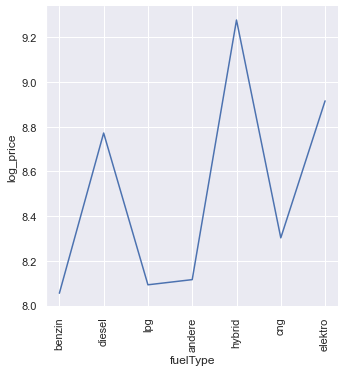

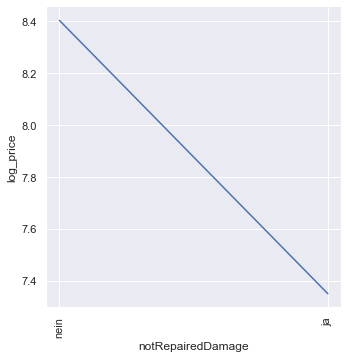

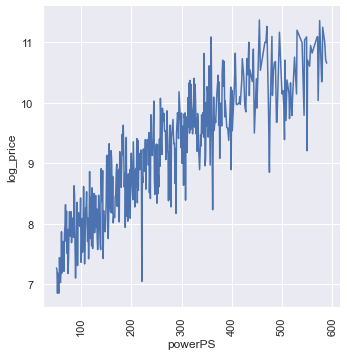

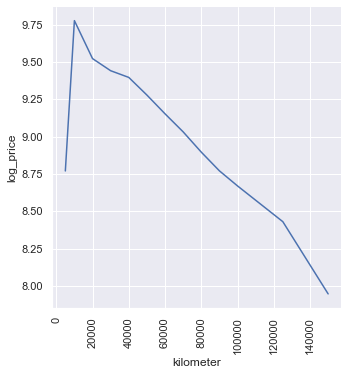

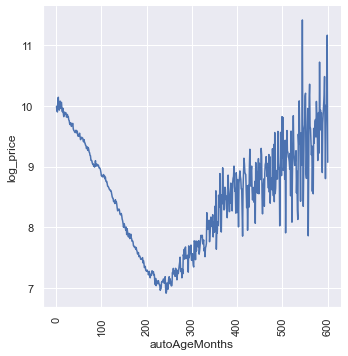

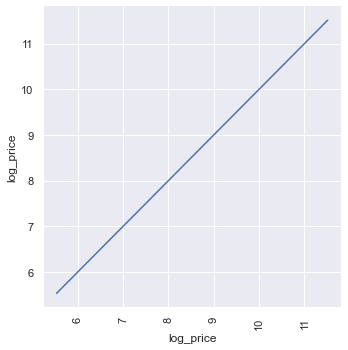

In [27]:
sns.set(rc={'figure.figsize':(20,35)})

for ind_ in range(1,df.shape[1] + 1):
    sns.relplot(data=df, x=df.iloc[:,ind_-1], y ='log_price', kind='line', ci=None)
    plt.xticks(rotation=90);

Предложение выполняющего работу: можно добавить 3 признака вметос признака brand:
1. является дешевым брендом (mean_log_price < 7.5)
2. является брендом среднего класса (7.5 <= mean_log_price < 9)
3. является "элитным брендом" (mean_log_price > 9)

In [28]:
gt = (df.groupby(by='brand')['log_price'].mean().reset_index(name='mean_log_price'))
print('Дешевые брэнды:', gt[gt['mean_log_price'] < 7.5]['brand'].to_list(),
      '\nБрэнды среднего класса:', gt[(gt['mean_log_price'] >= 7.5) & (gt['mean_log_price'] < 9)]['brand'].to_list(),
      '\nЭлитные брэнды:', gt[gt['mean_log_price'] >= 9]['brand'].to_list())


Дешевые брэнды: ['daewoo', 'daihatsu', 'rover'] 
Брэнды среднего класса: ['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen', 'dacia', 'fiat', 'ford', 'honda', 'hyundai', 'jaguar', 'kia', 'lada', 'lancia', 'mazda', 'mercedes_benz', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'saab', 'seat', 'skoda', 'smart', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo'] 
Элитные брэнды: ['jeep', 'land_rover', 'mini', 'porsche']


In [29]:
#добавим
df = df.assign(is_elit=df.brand.isin(gt[gt['mean_log_price'] >= 9]['brand'].to_list()))
df = df.assign(is_cheap = df.brand.isin(gt[gt['mean_log_price'] < 7.5]['brand'].to_list()))
df = df.assign(is_middle_class=df.brand.isin(gt[(gt['mean_log_price'] >= 7.5) & (gt['mean_log_price'] < 9)]['brand'].to_list()))
df.drop('brand',axis=1,inplace=True) #удалим брэнд
df.sample()

model vehicleType  gearbox fuelType notRepairedDamage  powerPS  \
178933    a4       kombi  manuell   diesel              nein      140   

        kilometer  autoAgeMonths  log_price  is_elit  is_cheap  \
178933     150000            126   8.592486    False     False   

        is_middle_class  
178933             True

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [30]:
df.dtypes

model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
is_elit                 bool
is_cheap                bool
is_middle_class         bool
dtype: object

In [31]:
categorical = df.select_dtypes(include='object').columns.difference(['model']).to_list()
numeric = df.select_dtypes(include=['int64','float64']).columns.difference(['log_price']).to_list()
other = df.select_dtypes(include='bool').columns.to_list()
# feature 'model' not used

In [32]:
x = df[categorical + numeric + other]
y = df['log_price']

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, np.array(y), test_size=0.2, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1) # 0.5 x 0.2 = 0.1

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

Для сравнения, что есть хорошо, а что плохо рассмотрим просто константное решение

In [35]:
from sklearn.metrics import mean_squared_error

best_constant = y_train.mean()
print("Test RMSLE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape)))
print("Train RMSLE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape)))

Test RMSLE with best constant = 1.1678
Train RMSLE with best constant = 1.1758


Возник очевидный вопрос, пишем RMSLE, а используем RMSE.   
Ответ: мы логарифмировали таргет, и на выход из модели получаем тоже логарифм таргета, поэтому rmse на логарифмах и есть rmsle

In [36]:
def find_lambda(descent_config, X_val, y_val, losses):
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        lin_reg = LinearRegression(descent_config)
        lin_reg.fit(X_val, y_val)
        y_pred = lin_reg.predict(X_val)
        losses.append(round(lin_reg.calc_loss(y_pred, y_val),5))
    best_lambda_ = lambdas[losses.index(min(losses))]
    return best_lambda_

In [37]:
def find_best_lambdas(descent_config, lambdas, X_val, y_val, descents=['stochastic','adam', 'full', 'momentum']):
    best_lambdas_ = []
    for i, name_ in enumerate(descents):
        losses = []
        descent_config['descent_name'] = name_

        best_lambda_ = find_lambda(descent_config, X_val, y_val, losses)
        best_lambdas_.append(best_lambda_)

        print(f"Best lambda for {name_} = {best_lambda_}")
        pylab.subplot(2,2,i+1)
        plt.plot(lambdas, losses)
        plt.title(name_)
        plt.xscale("log")
        plt.xlabel("lambda")
        plt.ylabel("loss")
    return best_lambdas_

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:27: RuntimeWarning: overflow encountered in power
  MSE = lambda y_pred, y_true: np.mean(np.power(y_pred-y_true,2))


Best lambda for stochastic = 0.8111308307896868
Best lambda for adam = 0.23101297000831592


D:\Anaconda\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:27: RuntimeWarning: overflow encountered in power
  MSE = lambda y_pred, y_true: np.mean(np.power(y_pred-y_true,2))


Best lambda for full = 2.0805675382171693


D:\Anaconda\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:27: RuntimeWarning: overflow encountered in power
  MSE = lambda y_pred, y_true: np.mean(np.power(y_pred-y_true,2))


Best lambda for momentum = 1.1103363181676378


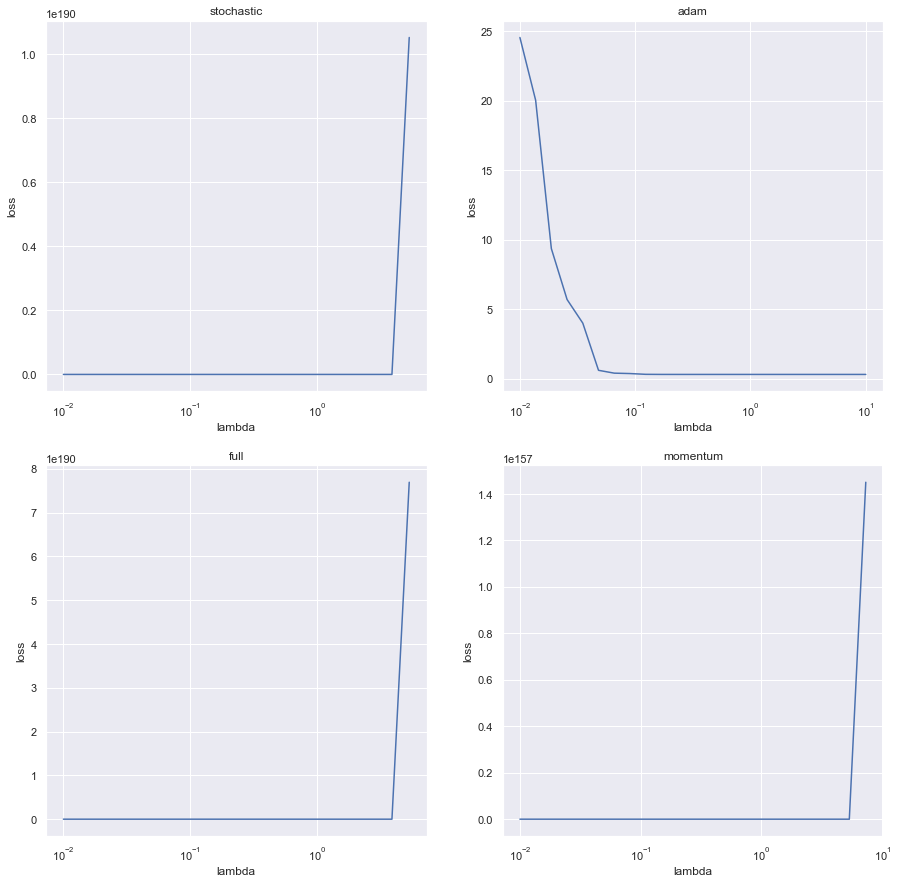

In [38]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# к сожалению GridSearchCV использовать не получится, т.к. наша модель принимает на вход словарь
from tqdm import tqdm

np.random.seed(777)

sns.set(rc={'figure.figsize':(15,15)})

lambdas = np.logspace(-2, 1, 23)


descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

best_lambdas_ = find_best_lambdas(descent_config, lambdas, X_val, y_val)

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [39]:
def train(descent_config, lambdas_, X_train, y_train, descents=['stochastic','adam', 'full', 'momentum']):
    for name_ in descents:
        losses = []
        descent_config['descent_name'] = name_
        descent_config['kwargs']['lambda_'] = lambdas_[name_]
        lin_reg = LinearRegression(descent_config)
        lin_reg.fit(X_train, y_train)
        print(f'Method {name_} gradient descent')
        y_train_pred = lin_reg.predict(X_train)
        y_test_pred = lin_reg.predict(X_test)
        print(
            f'Train Loss = {round(lin_reg.calc_loss(y_train, y_train_pred),3)} .. ',
            f'Test loss = {round(lin_reg.calc_loss(y_test, y_test_pred),3)}\n'
            f'Train r2 score = {round(r2_score(y_train, y_train_pred),3)} ..'
            f'Test r2 score = {round(r2_score(y_test, y_test_pred),3)}\n'
            f'Count Iterations = {lin_reg.iteration_}\n',
            sep=''
        )
        plt.plot(list(range(lin_reg.iteration_)), lin_reg.loss_history, label=name_, linewidth=2)
        plt.legend()
    plt.show()

Method stochastic gradient descent
Train Loss = 0.37 .. Test loss = 0.367
Train r2 score = 0.685 ..Test r2 score = 0.686
Count Iterations = 301

Method adam gradient descent
Train Loss = 0.311 .. Test loss = 0.309
Train r2 score = 0.735 ..Test r2 score = 0.735
Count Iterations = 301

Method full gradient descent
Train Loss = 0.314 .. Test loss = 0.312
Train r2 score = 0.733 ..Test r2 score = 0.733
Count Iterations = 301

Method momentum gradient descent
Train Loss = 0.311 .. Test loss = 0.309
Train r2 score = 0.735 ..Test r2 score = 0.735
Count Iterations = 301



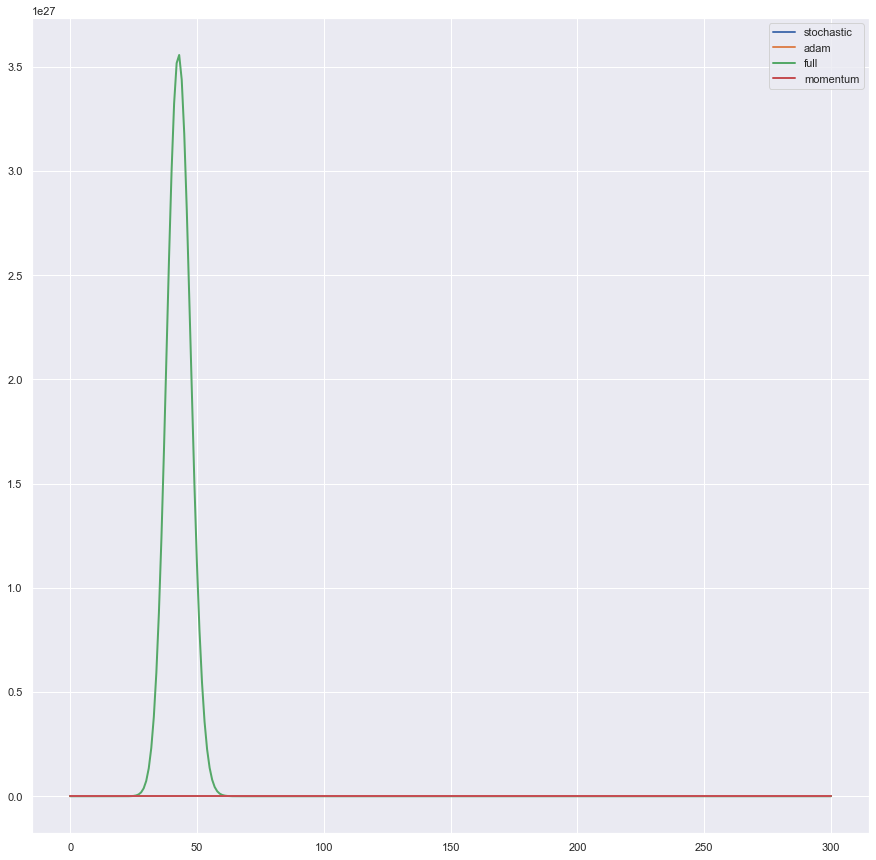

In [40]:
from sklearn.metrics import r2_score

# best_lambdas_ = [0.8111308307896868, 0.23101297000831592, 2.0805675382171693, 1.1103363181676378]
np.random.seed(777)

descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

lambdas_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_)
}

train(descent_config, lambdas_, X_train, y_train)

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Задание очень странно сформулировано. Несколько запусков и сходимость рядом стоять не могут. Совершенно не обязательно, что за 10 запусков процесс сойдется    
Также с таким маленьким tolerance процесс за 300 итераций не сойдется, а больше - слишком долго ждать. Поставим tolerance побольше, это не повлияет на помание сути процесса

In [41]:
import time

batch_sizes = np.arange(5, 500, 10)

np.random.seed(777)

descent_config = {
    'descent_name': 'stochastic',
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': lambdas_['stochastic']
    }
}

times = []
iterations = []
for batch_size in tqdm(batch_sizes):
    start_time = time.time()
    descent_config['kwargs']['batch_size'] = batch_size
    lin_reg = LinearRegression(descent_config, tolerance=1e-2)
    lin_reg.fit(X_train, y_train)
    times.append(time.time() - start_time)
    iterations.append(lin_reg.iteration_)
    
        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:26<00:00,  1.73s/it]


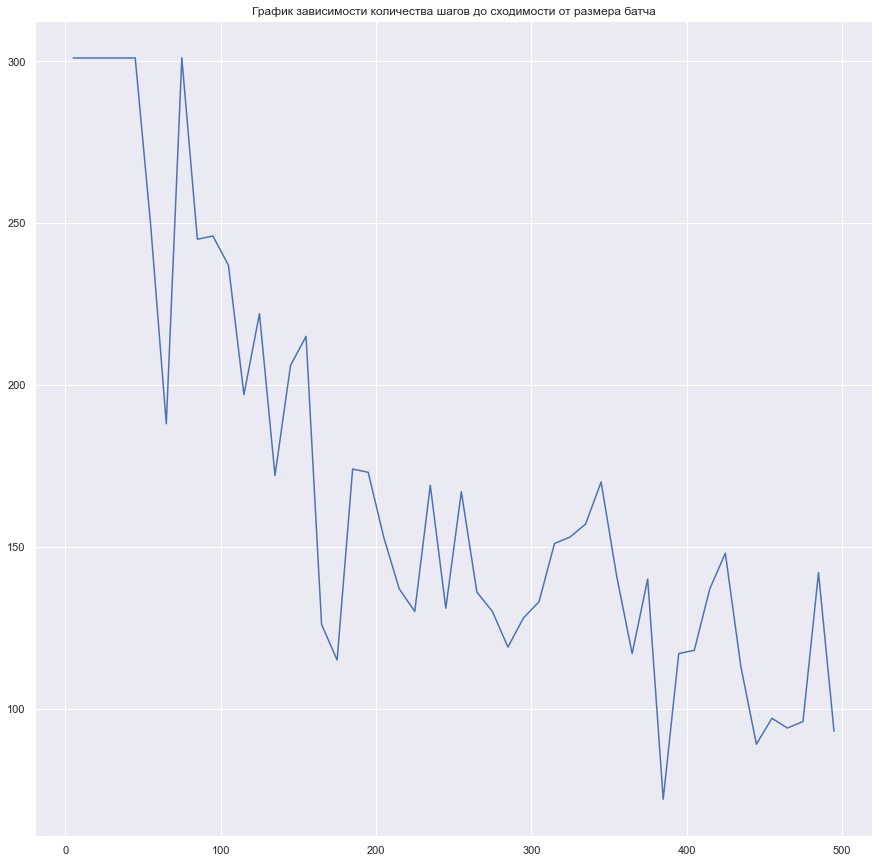

In [42]:
plt.plot(batch_sizes, iterations)
plt.title('График зависимости количества шагов до сходимости от размера батча')
plt.show()

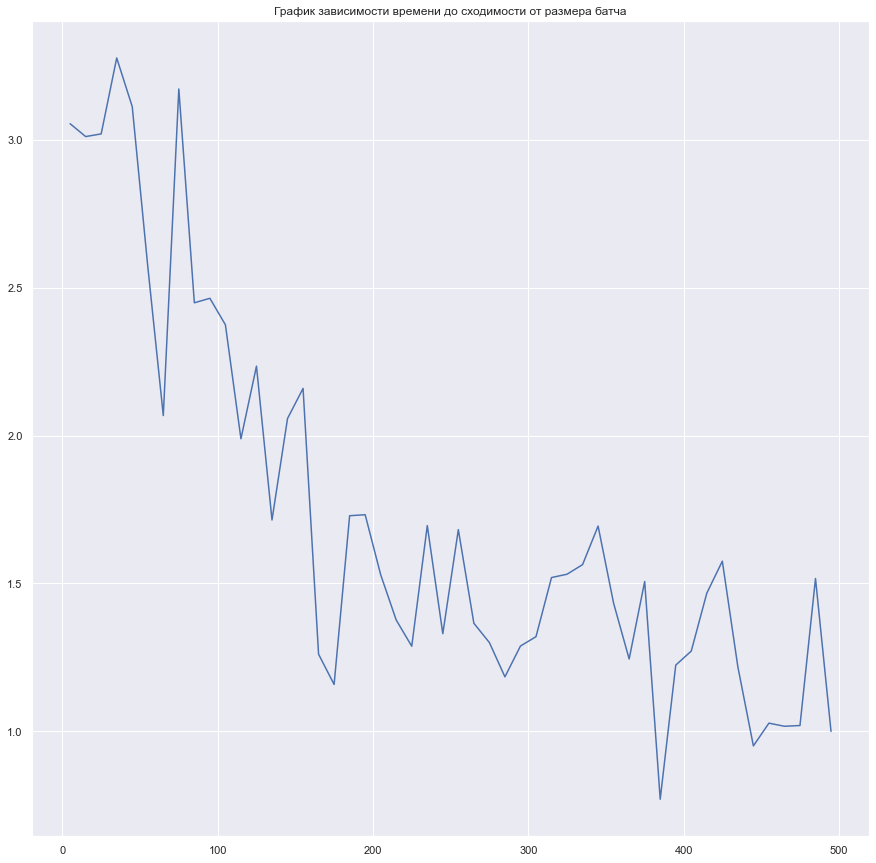

In [43]:
plt.plot(batch_sizes, times)
plt.title('График зависимости времени до сходимости от размера батча')
plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Тогда $$\nabla Q(w) = \dfrac{2}{\ell}X^T(Xw - y) + {\mu}w.$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Найдем лучшие параметры регуляризации   
Внимание - процесс долгий!

In [44]:
lambdas = np.logspace(-2, 1, 10)
mus = np.logspace(-2, 1, 23)

np.random.seed(777)

descent_config = {
    'regularized' : True,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

best_lambdas_regularized = []
best_mus_ = []
for i, name_ in enumerate(['stochastic','adam', 'full', 'momentum']):
    losses = []
    descent_config['descent_name'] = name_
    for lambda_ in tqdm(lambdas):
        for mu in mus:
            descent_config['kwargs']['lambda_'] = lambda_
            descent_config['kwargs']['mu'] = mu
            lin_reg = LinearRegression(descent_config)
            lin_reg.fit(X_val, y_val)
            y_pred = lin_reg.predict(X_val)
            losses.append(round(lin_reg.calc_loss(y_pred, y_val),5))
            
    ind_ = losses.index(min(losses))
    best_lambda_ = lambdas[ind_ // len(mus)] 
    best_mu_ = mus[ind_ % len(mus)]
    
    best_mus_.append(best_mu_)
    best_lambdas_regularized.append(best_lambda_)
    
    print(f"Best lambda for regularized {name_} = {best_lambda_}")
    print(f"Best mu for regularized {name_} = {best_mu_}")
    

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:16<00:18,  9.48s/it]D:\Anaconda\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:27: RuntimeWarning: overflow encountered in power
  MSE = lambda y_pred, y_true: np.mean(np.power(y_pred-y_true,2))
 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:26<00:09,  9.51s/it]D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:132: RuntimeWarning: overflow encountered in multiply
  return 2 * np.dot(x[sample].T, np.dot(x[sample], self.w) - y[sample]) / self.batch_size
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:38<00:00,  9.88s/it]


Best lambda for regularized stochastic = 0.46415888336127775
Best mu for regularized stochastic = 0.01873817422860384


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:07<00:00, 12.73s/it]


Best lambda for regularized adam = 10.0
Best mu for regularized adam = 0.01


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:50<00:12, 12.33s/it]D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:108: RuntimeWarning: overflow encountered in multiply
  return 2 * np.dot(x.T, np.dot(x, self.w) - y) / x.shape[0]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:08<00:00, 12.88s/it]


Best lambda for regularized full = 2.154434690031882
Best mu for regularized full = 0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:04<00:00, 12.44s/it]

Best lambda for regularized momentum = 1.0
Best mu for regularized momentum = 0.01


Method stochastic gradient descent without regularization
Train Loss = 0.37 .. Test loss = 0.367
Train r2 score = 0.685 ..Test r2 score = 0.686
Count Iterations = 301

Method stochastic gradient descent with regularization
Train Loss = 0.372 .. Test loss = 0.371
Train r2 score = 0.684 ..Test r2 score = 0.682
Count Iterations = 301

Method adam gradient descent without regularization
Train Loss = 0.311 .. Test loss = 0.309
Train r2 score = 0.735 ..Test r2 score = 0.735
Count Iterations = 301

Method adam gradient descent with regularization
Train Loss = 0.327 .. Test loss = 0.326
Train r2 score = 0.722 ..Test r2 score = 0.721
Count Iterations = 301

Method full gradient descent without regularization
Train Loss = 0.314 .. Test loss = 0.312
Train r2 score = 0.733 ..Test r2 score = 0.733
Count Iterations = 301

Method full gradient descent with regularization
Train Loss = 0.324 .. Test loss = 0.323
Train r2 score = 0.724 ..Test r2 score = 0.723
Count Iterations = 301

Method momentum grad

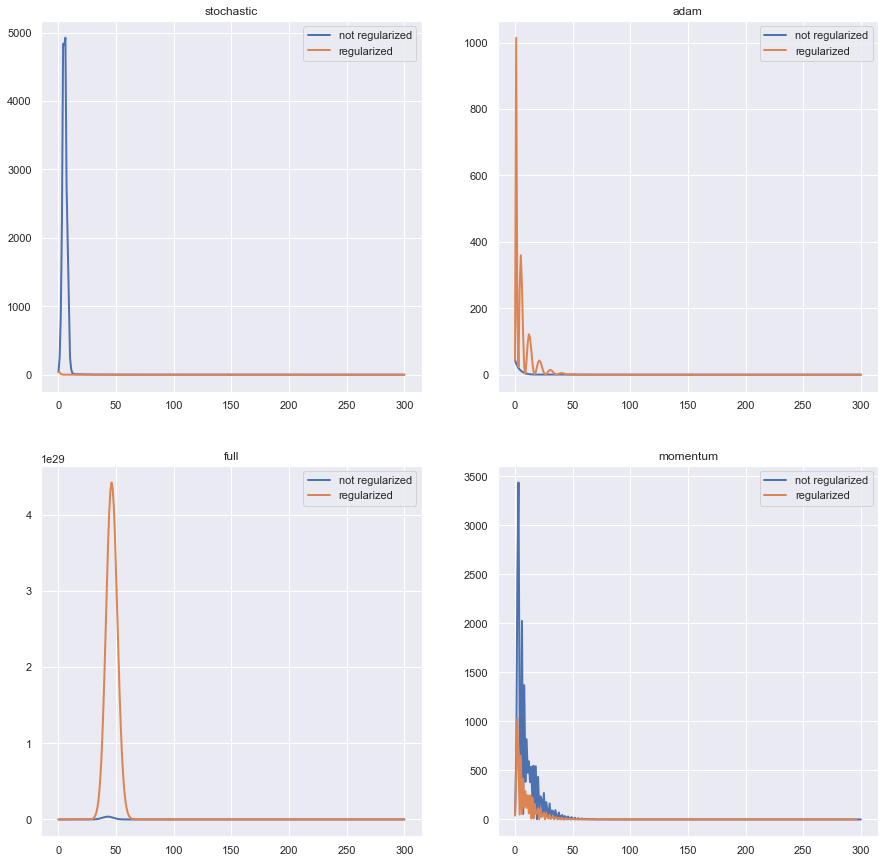

In [45]:
# best_lambdas_regularized = [0.46415888336127775, 10.0, 2.154434690031882, 1.0]
# best_mus_ = [0.01873817422860384, 0.01, 0.01, 0.01]
# best_lambdas_ = [0.8111308307896868, 0.23101297000831592, 2.0805675382171693, 1.1103363181676378]

np.random.seed(777)

descent_config = {
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

lambdas_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_)
}

lambdas_regularized = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_regularized)
}

mus_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_mus_)
}

ind_ = 1
for name_ in ['stochastic','adam', 'full', 'momentum']:
    for regularized in [False, True]:
        descent_config['regularized'] = regularized
        losses = []

        descent_config['descent_name'] = name_
        if regularized:
            descent_config['kwargs']['lambda_'] = lambdas_regularized[name_]
            descent_config['kwargs']['mu'] = mus_[name_]
            print(f'Method {name_} gradient descent with regularization')
        else:
            if 'mu' in descent_config['kwargs'].keys():
                del descent_config['kwargs']['mu']
            descent_config['kwargs']['lambda_'] = lambdas_[name_]
            print(f'Method {name_} gradient descent without regularization')

        lin_reg = LinearRegression(descent_config)
        lin_reg.fit(X_train, y_train)
        

        y_train_pred = lin_reg.predict(X_train)
        y_test_pred = lin_reg.predict(X_test)

        print(
            f'Train Loss = {round(lin_reg.calc_loss(y_train, y_train_pred),3)} .. ',
            f'Test loss = {round(lin_reg.calc_loss(y_test, y_test_pred),3)}\n'
            f'Train r2 score = {round(r2_score(y_train, y_train_pred),3)} ..'
            f'Test r2 score = {round(r2_score(y_test, y_test_pred),3)}\n'
            f'Count Iterations = {lin_reg.iteration_}\n',
            sep=''
        )
        pylab.subplot(2,2, ind_)
        plt.plot(list(range(lin_reg.iteration_)), lin_reg.loss_history, label='regularized' if regularized  else 'not regularized', linewidth=2) #график зависимости функции MSE от итерации
        plt.legend()
    plt.title(name_)
    ind_ += 1 
plt.show()   

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:    
Производная по L(y,a) равна th(a - y)

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:29: RuntimeWarning: overflow encountered in cosh
  LogCosh = lambda y_pred, y_true: np.sum(np.log(np.cosh(y_pred - y_true)))


Best lambda for stochastic = 0.12328467394420659
Best lambda for adam = 10.0


D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:29: RuntimeWarning: overflow encountered in cosh
  LogCosh = lambda y_pred, y_true: np.sum(np.log(np.cosh(y_pred - y_true)))


Best lambda for full = 0.01


D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:29: RuntimeWarning: overflow encountered in cosh
  LogCosh = lambda y_pred, y_true: np.sum(np.log(np.cosh(y_pred - y_true)))


Best lambda for momentum = 0.013688745095370805


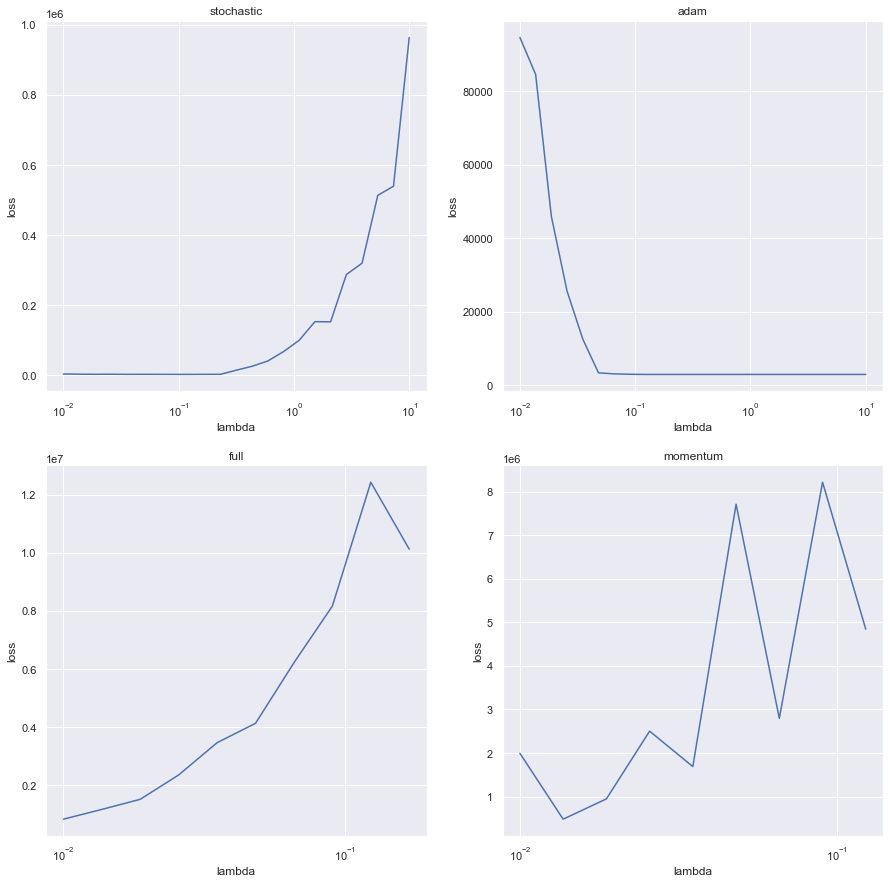

In [46]:
from descents import LossFunction

np.random.seed(777)

sns.set(rc={'figure.figsize':(15,15)})

lambdas = np.logspace(-2, 1, 23)

descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}

best_lambdas_ = find_best_lambdas(descent_config, lambdas, X_val, y_val)

Method stochastic gradient descent
Train Loss = 24503.007 .. Test loss = 3053.066
Train r2 score = 0.707 ..Test r2 score = 0.707
Count Iterations = 301

Method adam gradient descent
Train Loss = 23590.567 .. Test loss = 2932.47
Train r2 score = 0.727 ..Test r2 score = 0.728
Count Iterations = 216



D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:29: RuntimeWarning: overflow encountered in cosh
  LogCosh = lambda y_pred, y_true: np.sum(np.log(np.cosh(y_pred - y_true)))


Method full gradient descent
Train Loss = 64352335.247 .. Test loss = 8051249.412
Train r2 score = -99137.289 ..Test r2 score = -99996.635
Count Iterations = 301



D:\GitHub\ml-course-hse\2021-fall\homeworks-practice\homework-practice-03-gd\descents.py:29: RuntimeWarning: overflow encountered in cosh
  LogCosh = lambda y_pred, y_true: np.sum(np.log(np.cosh(y_pred - y_true)))


Method momentum gradient descent
Train Loss = 41733922.128 .. Test loss = 5217436.725
Train r2 score = -42310.107 ..Test r2 score = -42613.354
Count Iterations = 301



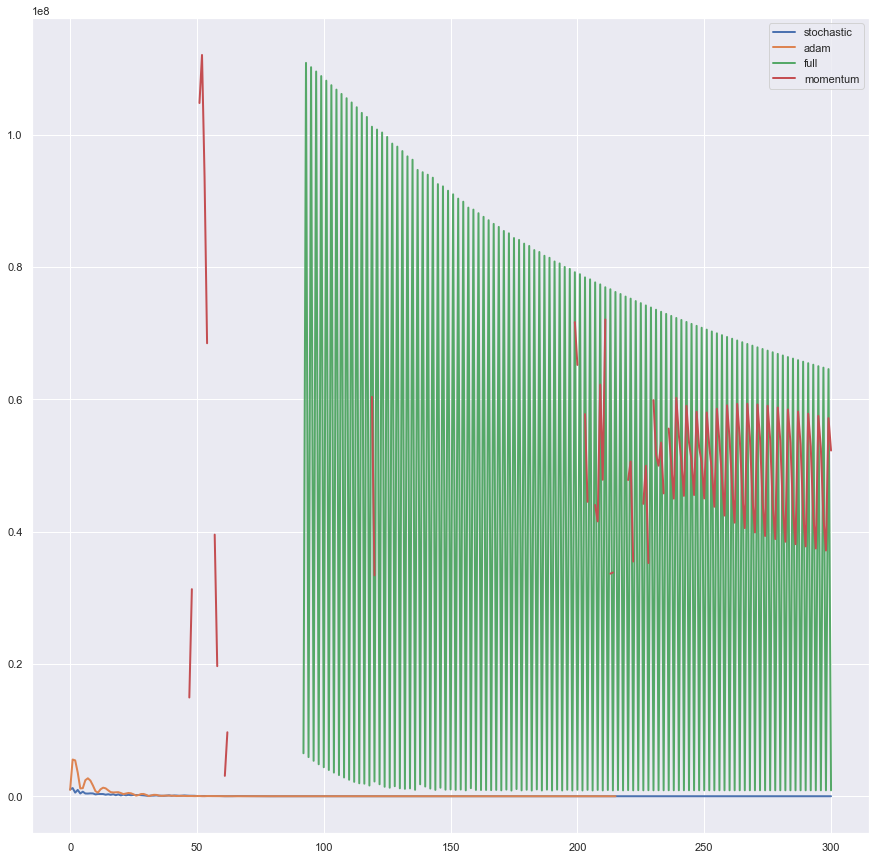

In [47]:
from sklearn.metrics import r2_score
#best_lambdas_ = [0.12328467394420659, 10.0, 0.01, 0.013688745095370805]
np.random.seed(777)

descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}

lambdas_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_)
}

train(descent_config, lambdas_, X_train, y_train)

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Best lambda for nadam = 0.23101297000831592


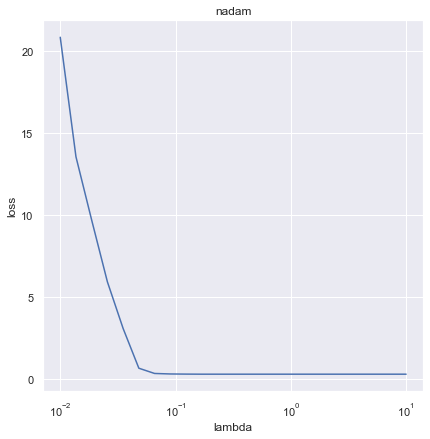

In [48]:
from descents import LossFunction

np.random.seed(777)

sns.set(rc={'figure.figsize':(15,15)})

lambdas = np.logspace(-2, 1, 23)

descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

best_lambdas_ = find_best_lambdas(descent_config, lambdas, X_val, y_val, descents=['nadam'])

Method nadam gradient descent
Train Loss = 0.311 .. Test loss = 0.309
Train r2 score = 0.736 ..Test r2 score = 0.735
Count Iterations = 270



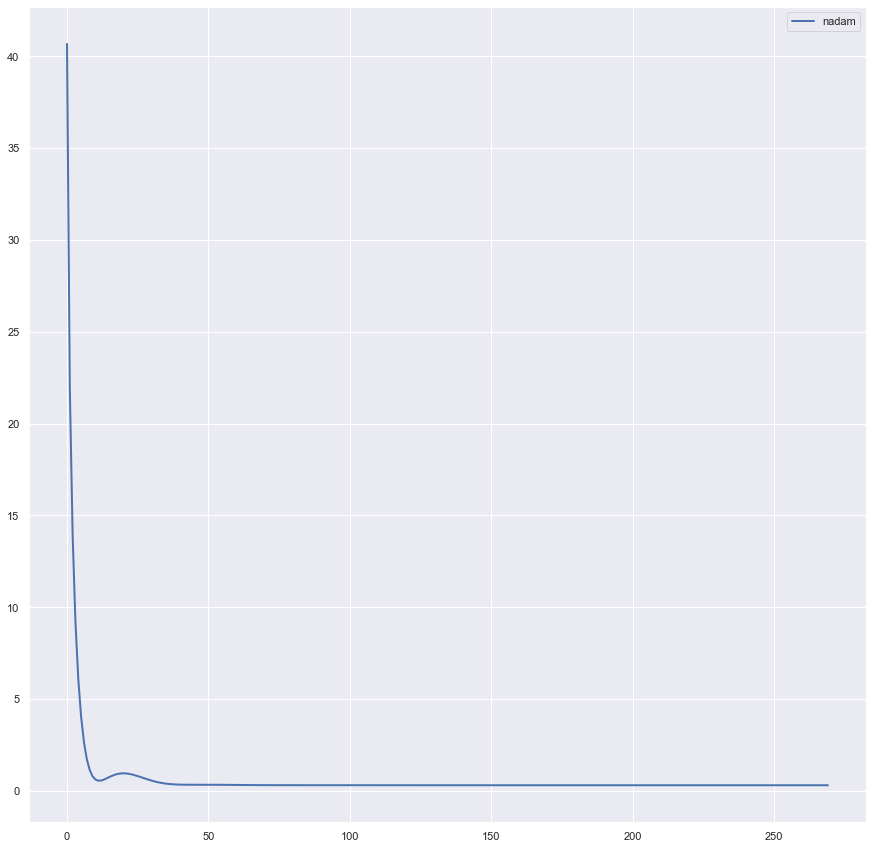

In [49]:
from sklearn.metrics import r2_score
np.random.seed(777)
#best_lambda_ = 0.23101297000831592
sns.set(rc={'figure.figsize':(15,15)})

descent_config = {
    'regularized' : False,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

lambdas_ = {
    'nadam': best_lambdas_[0]
}

train(descent_config, lambdas_, X_train, y_train, descents=['nadam'])

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

Best lambda for stochastic = 0.09006280202112786
Best lambda for adam = 0.12328467394420659
Best lambda for full = 3.898603702549072
Best lambda for momentum = 3.898603702549072


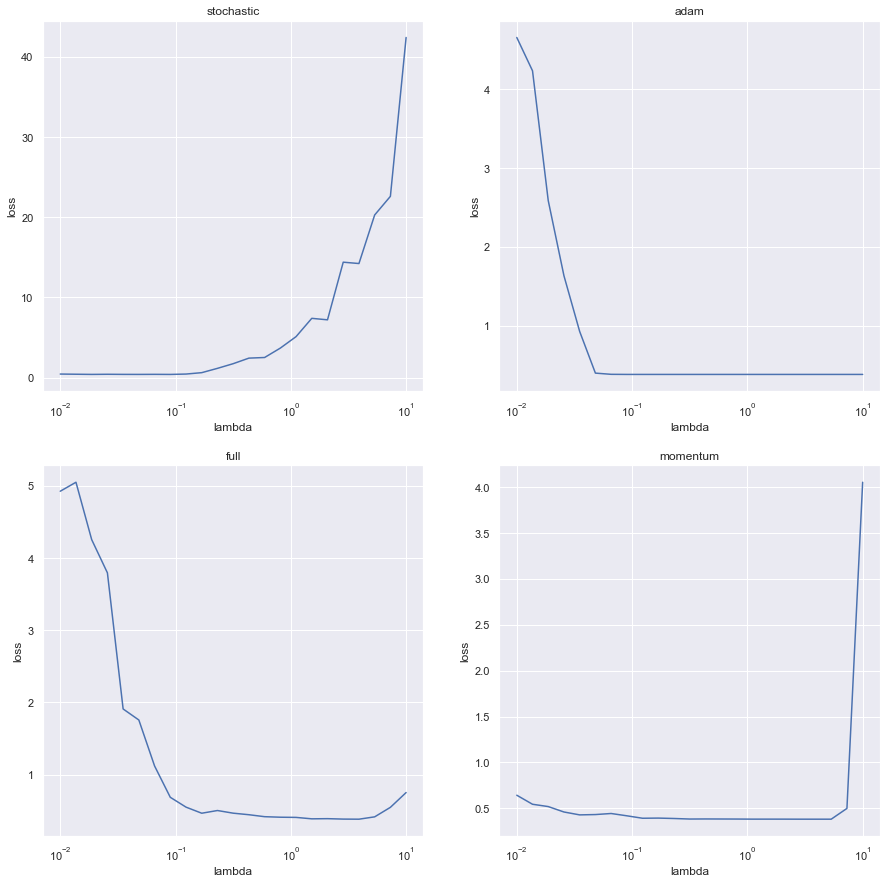

In [50]:
from descents import LossFunction
import tqdm

np.random.seed(777)

sns.set(rc={'figure.figsize':(15,15)})

lambdas = np.logspace(-2, 1, 23)

descent_config = {
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.MAE
    }
}

best_lambdas_ = find_best_lambdas(descent_config, lambdas, X_val, y_val)

Method stochastic gradient descent
Train Loss = 0.447 .. Test loss = 0.446
Train r2 score = 0.642 ..Test r2 score = 0.642
Count Iterations = 301

Method adam gradient descent
Train Loss = 0.383 .. Test loss = 0.381
Train r2 score = 0.704 ..Test r2 score = 0.705
Count Iterations = 222

Method full gradient descent
Train Loss = 0.386 .. Test loss = 0.384
Train r2 score = 0.702 ..Test r2 score = 0.703
Count Iterations = 301

Method momentum gradient descent
Train Loss = 0.383 .. Test loss = 0.381
Train r2 score = 0.704 ..Test r2 score = 0.705
Count Iterations = 301



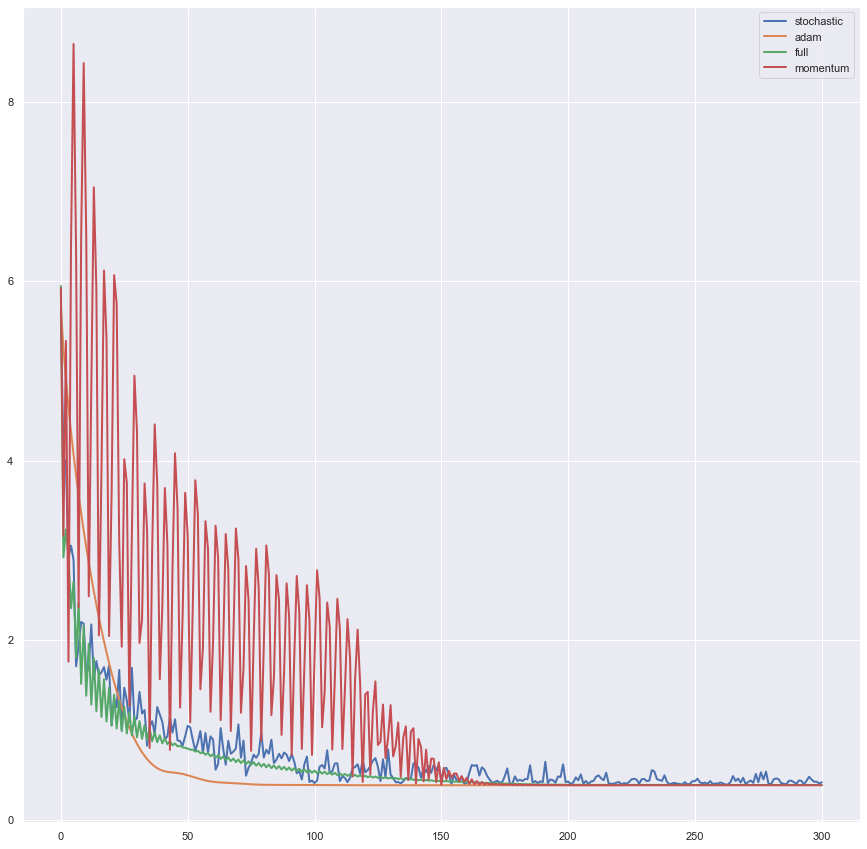

In [51]:
from sklearn.metrics import r2_score
lambdas_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_)
}

train(descent_config, lambdas_, X_train, y_train)

Best lambda for stochastic = 5.336699231206307
Best lambda for adam = 0.12328467394420659
Best lambda for full = 10.0
Best lambda for momentum = 10.0


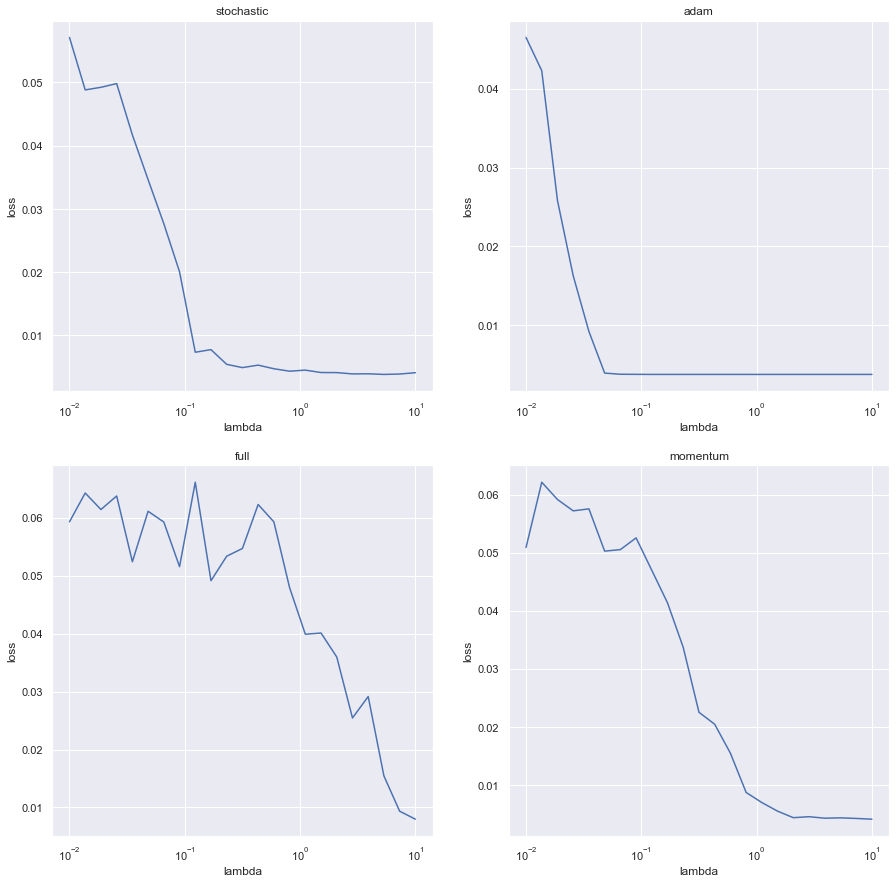

In [52]:
from descents import LossFunction
import tqdm

np.random.seed(777)

sns.set(rc={'figure.figsize':(15,15)})

lambdas = np.logspace(-2, 1, 23)

descent_config = {
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.Huber
    }
}

best_lambdas_ = find_best_lambdas(descent_config, lambdas, X_val, y_val)

Method stochastic gradient descent
Train Loss = 0.004 .. Test loss = 0.004
Train r2 score = 0.678 ..Test r2 score = 0.678
Count Iterations = 301

Method adam gradient descent
Train Loss = 0.004 .. Test loss = 0.004
Train r2 score = 0.704 ..Test r2 score = 0.705
Count Iterations = 223

Method full gradient descent
Train Loss = 0.007 .. Test loss = 0.007
Train r2 score = 0.176 ..Test r2 score = 0.173
Count Iterations = 301

Method momentum gradient descent
Train Loss = 0.004 .. Test loss = 0.004
Train r2 score = 0.643 ..Test r2 score = 0.645
Count Iterations = 301



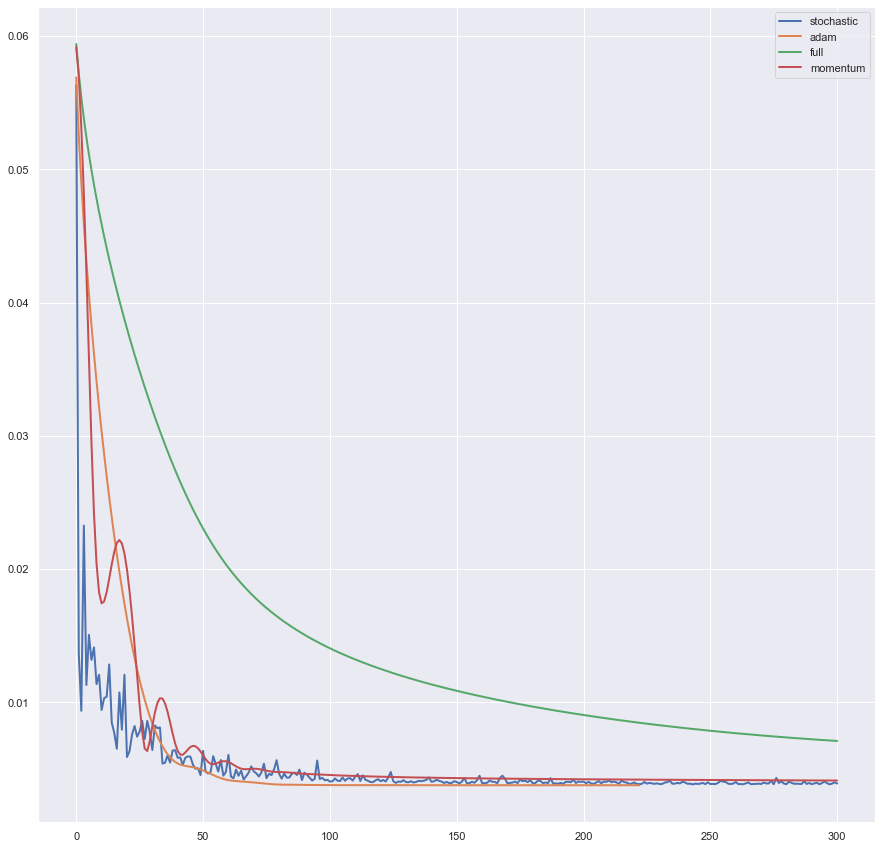

In [53]:
from sklearn.metrics import r2_score
lambdas_ = {
    i : j for i,j in zip(['stochastic','adam', 'full', 'momentum'], best_lambdas_)
}

train(descent_config, lambdas_, X_train, y_train)